In [1]:
#Standard Imports
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults,ARMA,ARMAResults
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd


In [2]:

weather_50y = pd.read_csv(r'./data/weather_50y.csv', parse_dates=True, index_col='date')

In [3]:
weather_50y.head()

,temp
date,
1971-01-01,-95
1971-01-02,-96
1971-01-03,-144
1971-01-04,-117
1971-01-05,-83


In [5]:
df = weather_50y.iloc[-1000:]

In [6]:
df.head()

,temp
date,
2018-09-05,193
2018-09-06,197
2018-09-07,181
2018-09-08,156
2018-09-09,178


In [45]:
Sarimax_model = auto_arima(df['temp'],
                       start_P=1,
                       start_q=1,
                       max_p=3,
                       max_q=3,
                       m=12,
                       seasonal=True,
                       d=None,
                       D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)
Sarimax_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=3.87 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=10508.437, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=9292.127, Time=1.30 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=9582.559, Time=1.15 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=10506.574, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=9594.166, Time=0.30 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=9203.341, Time=3.88 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=10.29 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.03 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=10305.751, Time=2.31 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=9175.352, Time=4.57 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=9257.191, Time=1.26 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=13.49 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.34 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1000
Model:             SARIMAX(2, 0, 2)x(2, 1, [], 12)   Log Likelihood               -4562.345
Date:                             Sun, 27 Jun 2021   AIC                           9138.691
Time:                                     16:18:52   BIC                           9172.960
Sample:                                          0   HQIC                          9151.723
                                            - 1000                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5356      0.068     22.735      0.000       1.403       1.668
ar.L2         -0.5483      0.062     -8.852      0.000      -0.670      -0.427
ma.L1         -0.5512      0.067     -8.186      0.000      -0.683      -0.419
ma.L2         -0.3123      0.035     -8.955      0.000      -0.381      -0.244
ar.S.L12      -0.6871      0.032    -21.456      0.000      -0.750      -0.624
ar.S.L24      -0.3184      0.031    -10.185      0.000      -0.380      -0.257
sigma2       596.0572     24.992     23.850      0.000     547.074     645.041
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                11.62
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.16
Prob(H) (two-sided):                  0.69   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
model = SARIMAX(df['temp'],order=(2, 0, 2),
              seasonal_order=(2, 1, 0, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)
results = model.fit()

/Users/FelixAir/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/FelixAir/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [8]:
df.head()

,temp
date,
2018-09-05,193
2018-09-06,197
2018-09-07,181
2018-09-08,156
2018-09-09,178


In [9]:
forecast = results.predict(start= len(df), end = len(df)+7, typ='levels').rename('data sarimax (2,0,2) forecast')

<AxesSubplot:xlabel='date'>

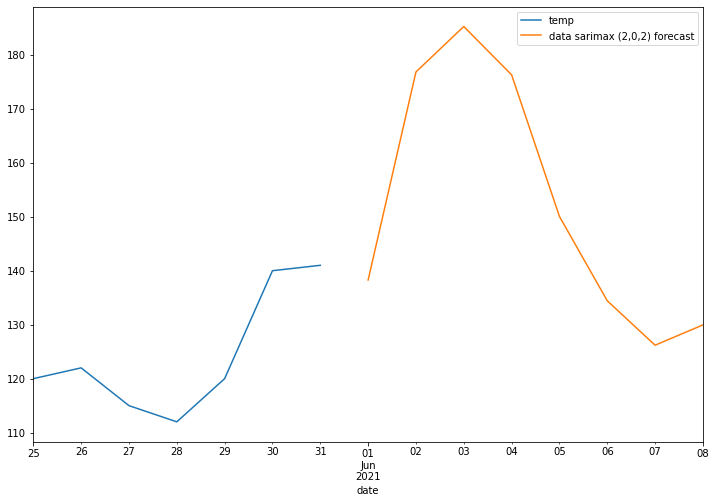

In [12]:
df['temp'].iloc[-7:].plot(figsize=(12,8),legend=True)
forecast.plot(legend=True)

In [52]:
https://www.wetterkontor.de/de/wetter/deutschland/rueckblick.asp?id=20

,temp
date,
2021-05-27,115
2021-05-28,112
2021-05-29,120
2021-05-30,140
2021-05-31,141


In [ ]:
30.05.2021	 14	
31.05.2021	 14,1	
01.06.2021	 16,8	
02.06.2021   25,4	
03.06.2021   27,2	
04.06.2021	 24	
05.06.2021	 27,7	
06.06.2021	 28,6	
07.06.2021	 26,7	
08.06.2021	 26,5	
09.06.2021	 26,8	